In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.qmc import Halton
from scipy.special import rel_entr
from scipy.special import erf
from scipy.optimize import root
from scipy.special import gamma
from scipy.special import gammaincc

import sys, os

sys.path.append("..")

from qmc_base import qmcSampler
from qmc_base import HaltonGenerator
from qmc_base import randomGenerator
import matplotlib.pyplot as plt
import numpy as np

# One-Dimensional Sampling

In [2]:
qmcGS = qmcSampler(d=1, generator=HaltonGenerator)
randGS = qmcSampler(d=1, generator=randomGenerator)

## Uniform Sampling

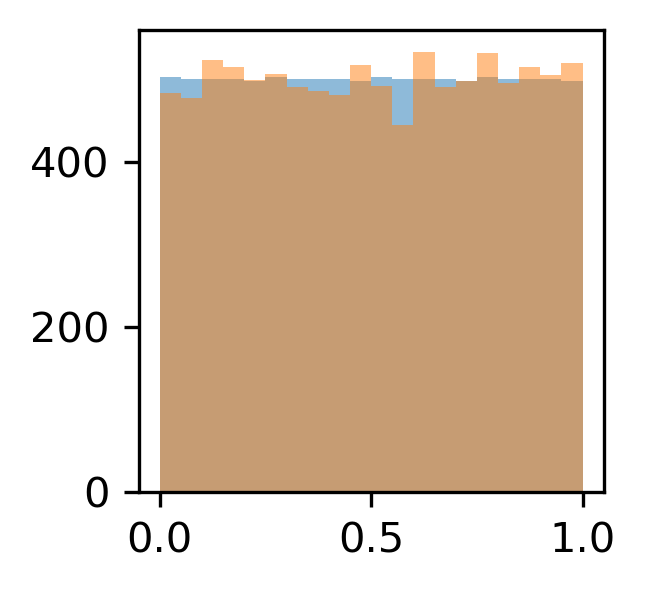

In [3]:
# demonstrate gaussian sampling

plt.figure(figsize=(2, 2), dpi=300)
nsamples = 10000
plt.hist(qmcGS.sampleUniform(nsamples), bins=np.linspace(0, 1, 21), alpha=.5)
plt.hist(randGS.sampleUniform(nsamples), bins=np.linspace(0, 1, 21), alpha=.5)
plt.show()

## Gaussian Sampling

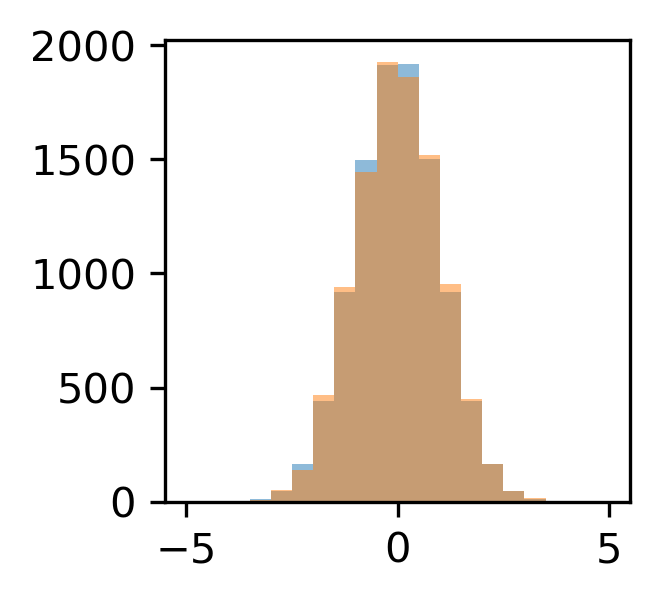

In [4]:
# demonstrate gaussian sampling

plt.figure(figsize=(2, 2), dpi=300)
nsamples = 10000
plt.hist(qmcGS.sampleIsotropicGaussian(nsamples, scale=1.),
         bins=np.linspace(-5, 5, 21),
         alpha=.5)
plt.hist(randGS.sampleIsotropicGaussian(nsamples, scale=1.),
         bins=np.linspace(-5, 5, 21),
         alpha=.5)
plt.show()

# Two-Dimensional Sampling

In [5]:
qmcGS = qmcSampler(d=2, generator=HaltonGenerator)
randGS = qmcSampler(d=2, generator=randomGenerator)

## Uniform Sampling

(0.0, 1.0)

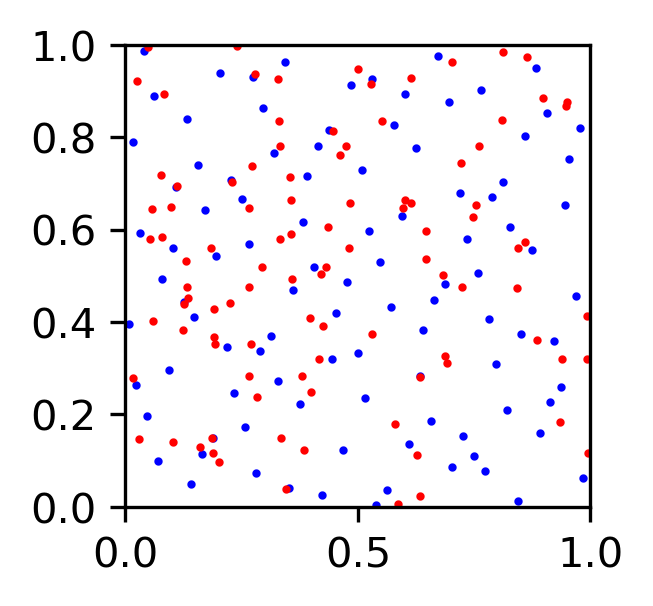

In [6]:
# demonstrate uniform sampling

plt.figure(figsize=(2, 2), dpi=300)
nsamples = 100
plt.scatter(qmcGS.sampleUniform(nsamples)[:, 0],
            qmcGS.sampleUniform(nsamples)[:, 1],
            c='b',
            s=1)
plt.scatter(randGS.sampleUniform(nsamples)[:, 0],
            randGS.sampleUniform(nsamples)[:, 1],
            c='r',
            s=1)
plt.xlim((0, 1))
plt.ylim((0, 1))

Text(0.5, 1.0, 'Random')

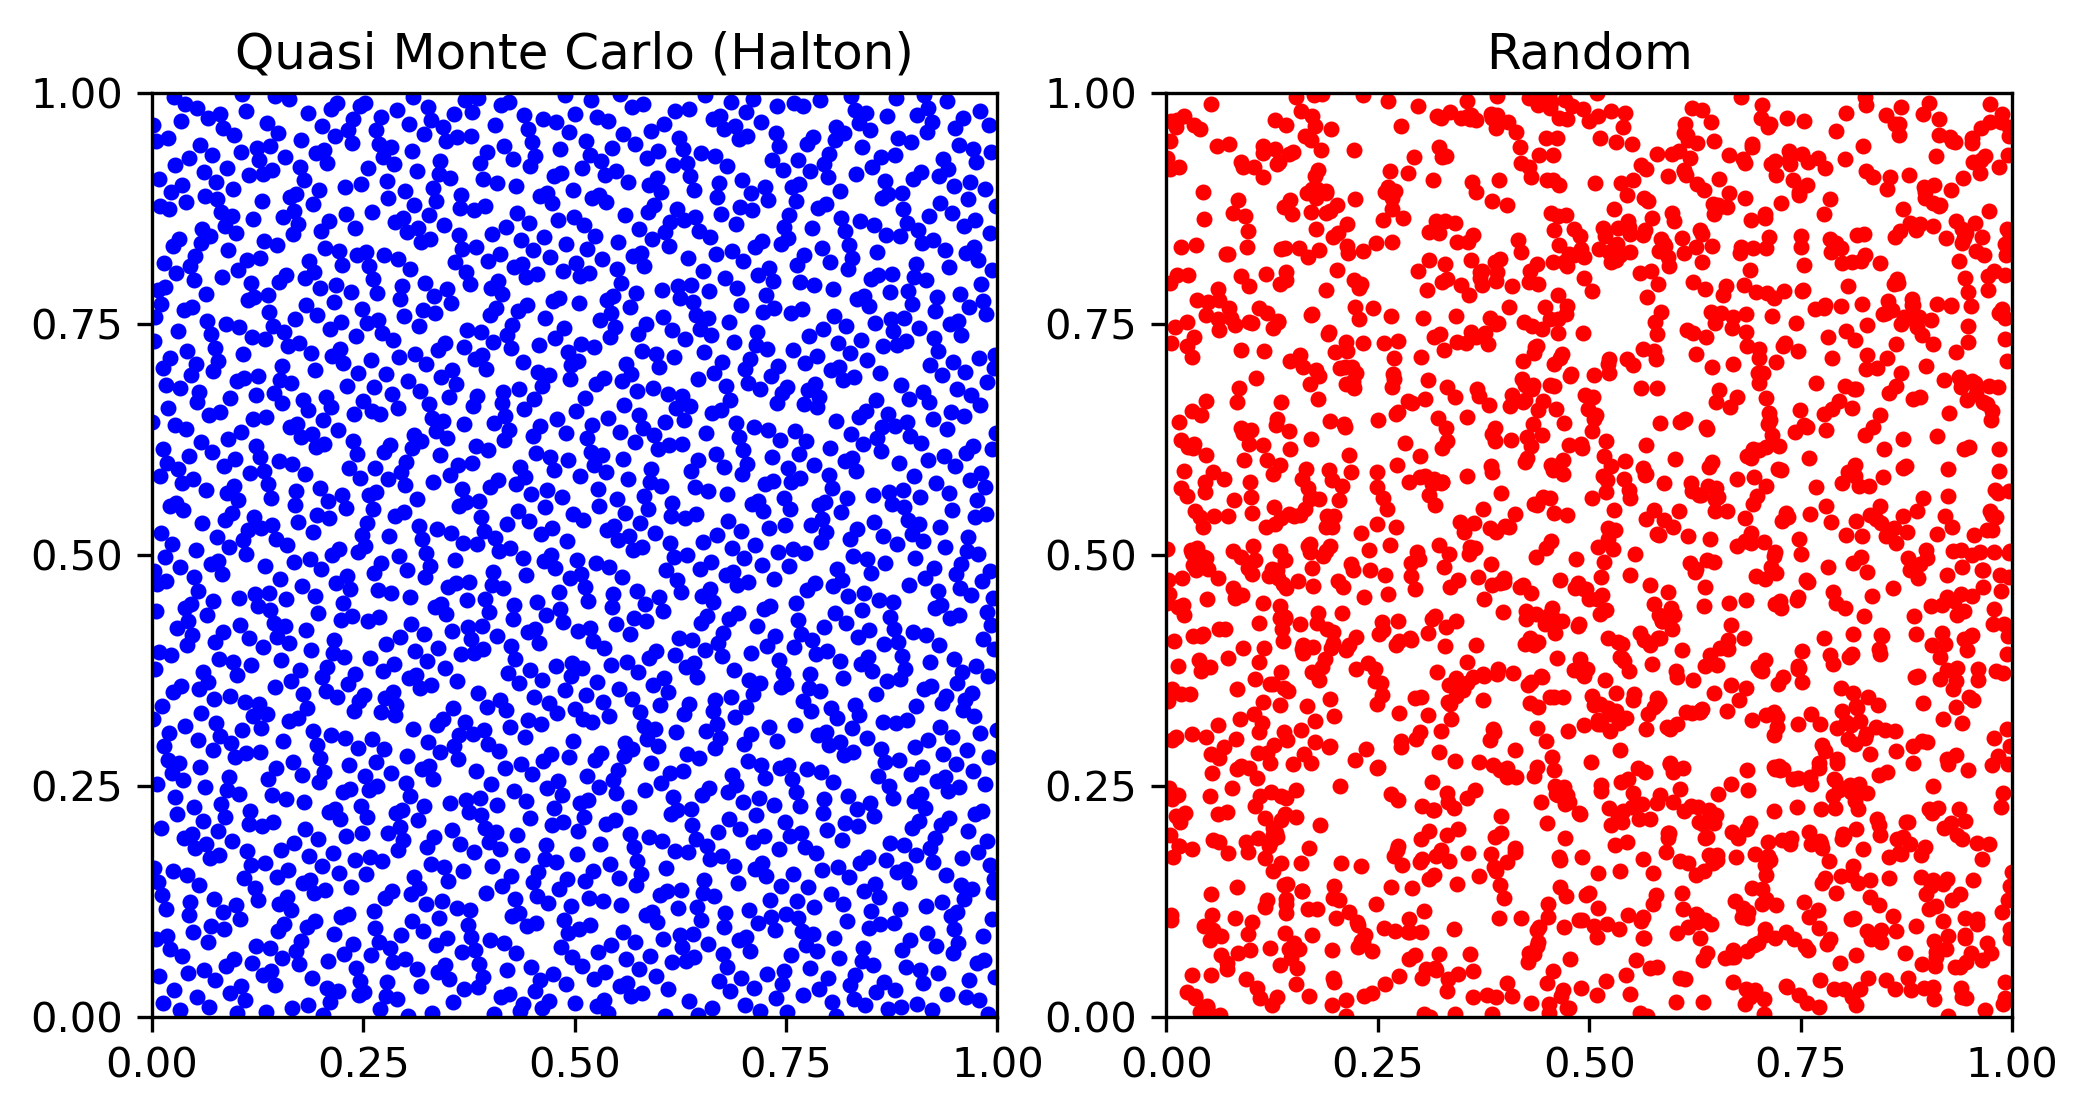

In [7]:
# demonstrate uniform sampling
nsamples = 2000

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
ax[0].scatter(qmcGS.sampleUniform(nsamples)[:, 0],
              qmcGS.sampleUniform(nsamples)[:, 1],
              c='b',
              s=8)
ax[0].set_xlim((0, 1))
ax[0].set_ylim((0, 1))
ax[0].set_xticks(np.linspace(0, 1, 5))
ax[0].set_yticks(np.linspace(0, 1, 5))
ax[0].set_title('Quasi Monte Carlo (Halton)')

ax[1].scatter(randGS.sampleUniform(nsamples)[:, 0],
              randGS.sampleUniform(nsamples)[:, 1],
              c='r',
              s=8)
ax[1].set_xlim((0, 1))
ax[1].set_ylim((0, 1))
ax[1].set_xticks(np.linspace(0, 1, 5))
ax[1].set_yticks(np.linspace(0, 1, 5))
ax[1].set_title('Random')

## Gaussian Samplig

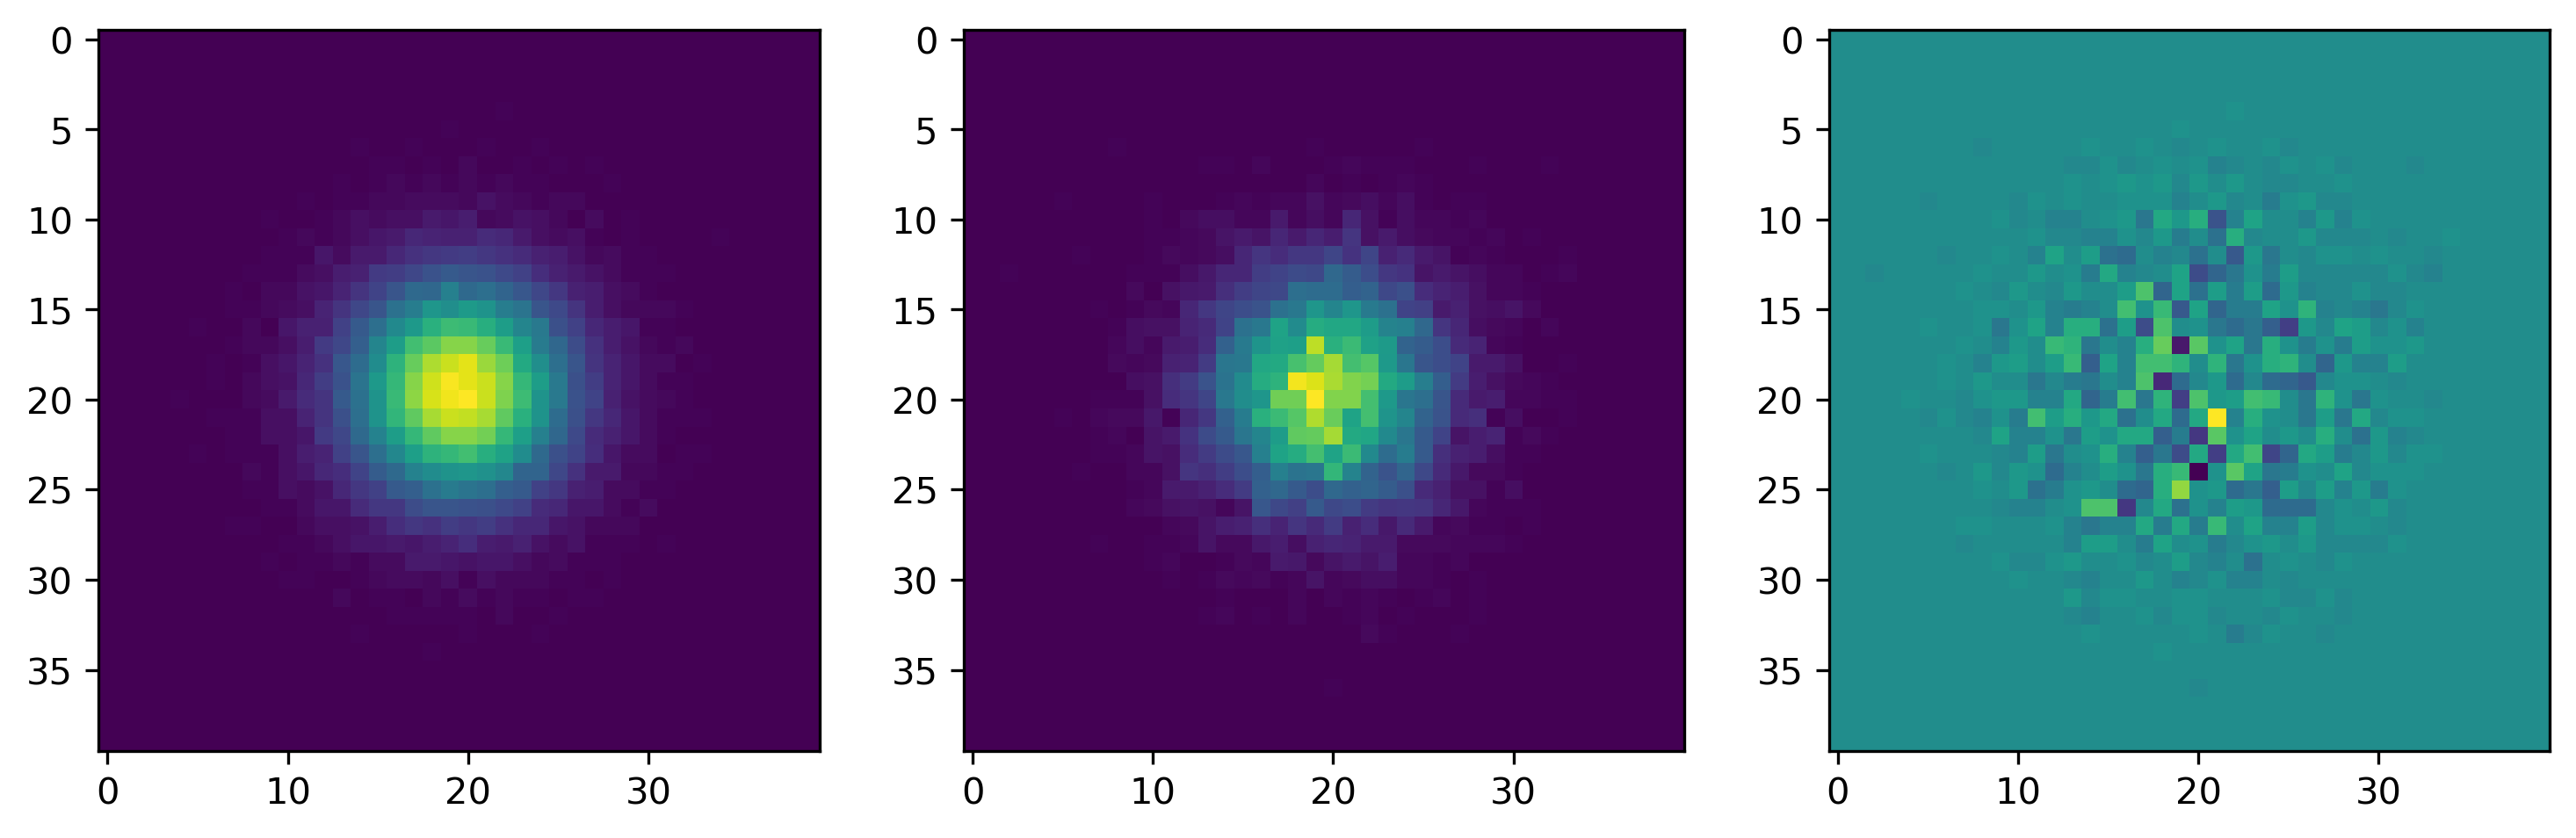

In [8]:
# demonstrate gaussian sampling

fig, ax = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
nsamples = 10000
nbins = 40
normPoints = np.random.normal(size=(nsamples, 3))

qmcPoints = qmcGS.sampleIsotropicGaussian(nsamples, scale=1.)
randPoints = randGS.sampleIsotropicGaussian(nsamples, scale=1.)

qmcHist, _ = np.histogramdd(
    (qmcPoints[:, 0], qmcPoints[:, 1]),
    bins=(np.linspace(-5, 5, nbins + 1), np.linspace(-5, 5, nbins + 1)))
normHist, _ = np.histogramdd(
    (randPoints[:, 0], randPoints[:, 1]),
    bins=(np.linspace(-5, 5, nbins + 1), np.linspace(-5, 5, nbins + 1)))

ax[0].imshow(qmcHist)
ax[1].imshow(normHist)
ax[2].imshow(qmcHist - normHist)

## Anisotropic Gaussians

(-5.0, 5.0)

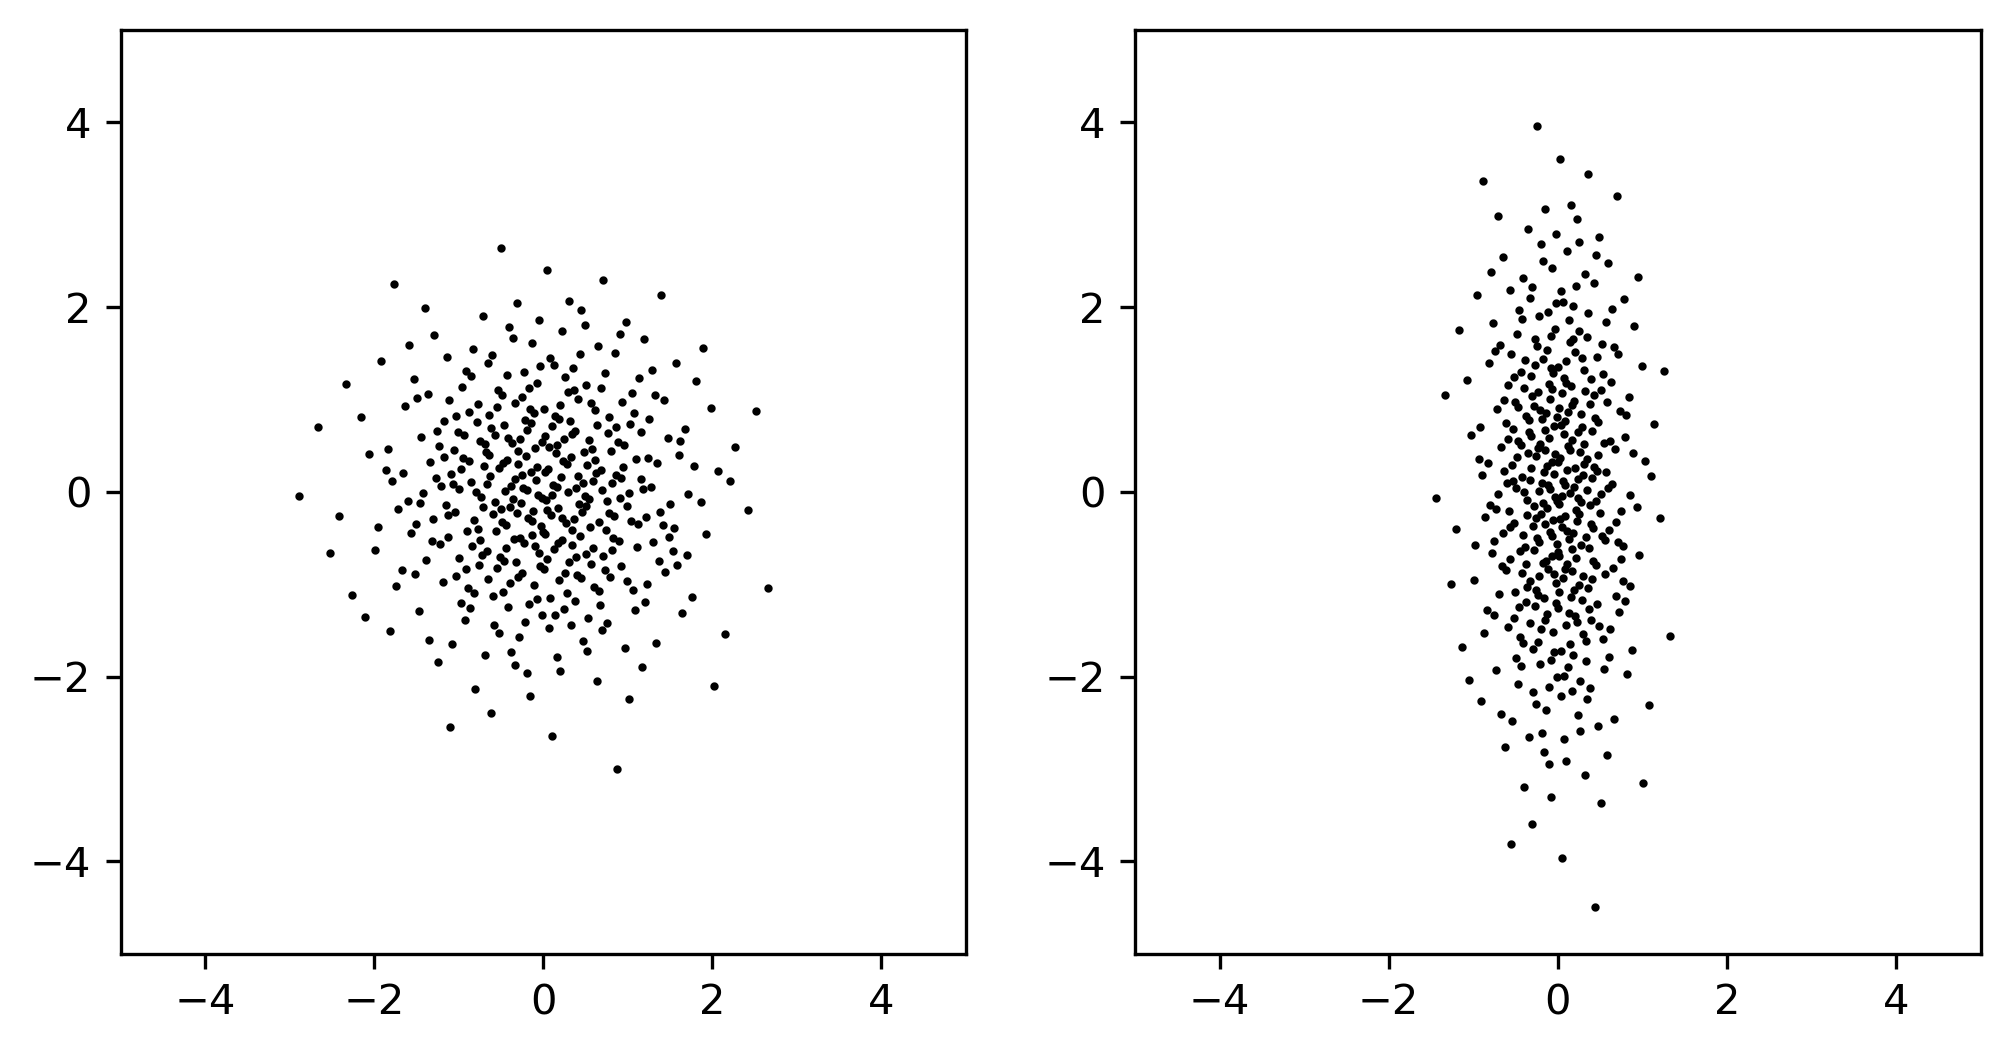

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
nsamples = 400
gaussPoints = qmcGS.sampleUnitIsotropicGaussian(nsamples)
ax[0].scatter(gaussPoints[:, 0], gaussPoints[:, 1], s=1, c='k')
ax[0].set_xlim((-5, 5))
ax[0].set_ylim((-5, 5))

scales = np.array([.5, 1.5])
gaussPoints = qmcGS.sampleAnisotropicGaussian(nsamples, scales)
ax[1].scatter(gaussPoints[:, 0], gaussPoints[:, 1], s=1, c='k')
ax[1].set_xlim((-5, 5))
ax[1].set_ylim((-5, 5))

## Truncated Gaussians

Efficiency: 31.5%
Efficiency: 31.5%


(-5.0, 5.0)

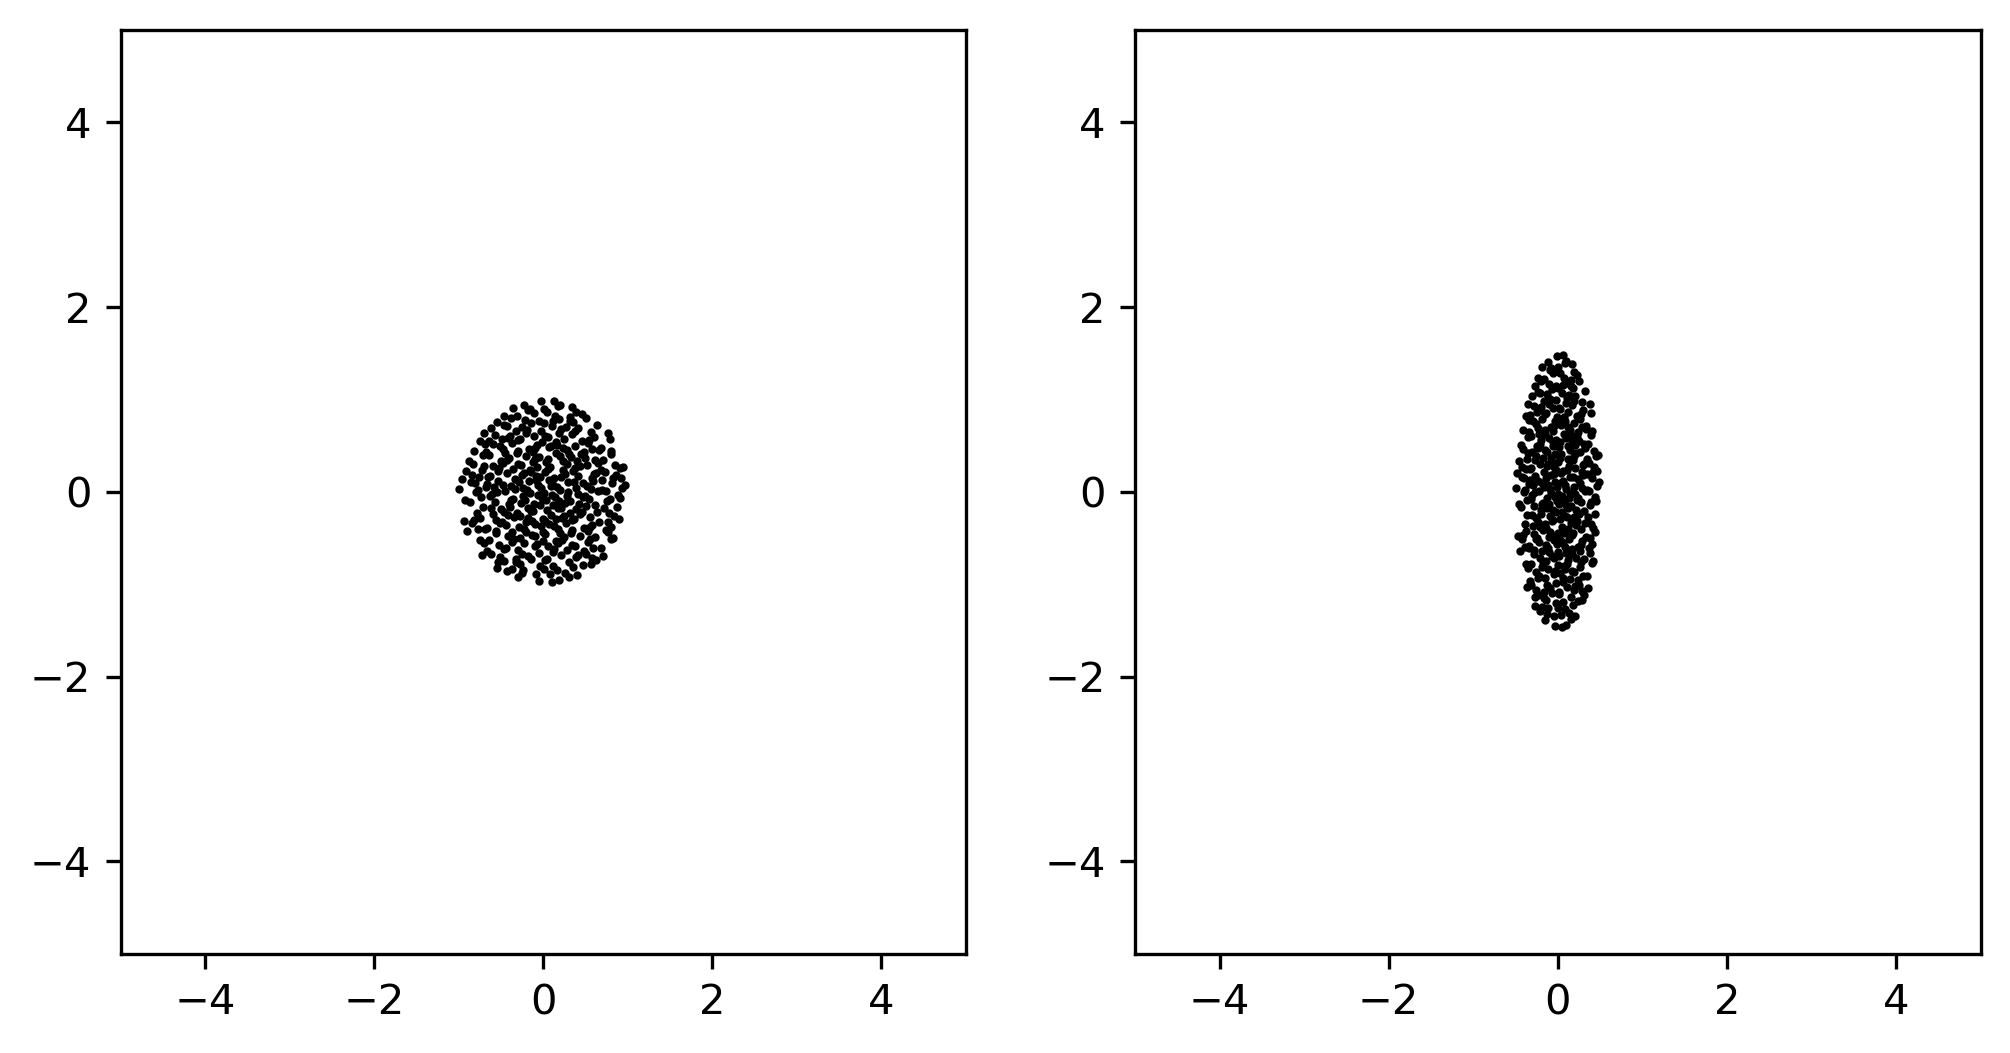

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)
nsamples = 400
truncation_scale = 1.
gaussPoints = qmcGS.sampleUnitIsotropicGaussian(nsamples, truncate=True, truncScale=truncation_scale)
ax[0].scatter(gaussPoints[:, 0], gaussPoints[:, 1], s=1, c='k')
ax[0].set_xlim((-5, 5))
ax[0].set_ylim((-5, 5))

scales = np.array([.5, 1.5])
gaussPoints = qmcGS.sampleAnisotropicGaussian(nsamples, scales=scales, truncate=True, truncScale=truncation_scale)
ax[1].scatter(gaussPoints[:, 0], gaussPoints[:, 1], s=1, c='k')
ax[1].set_xlim((-5, 5))
ax[1].set_ylim((-5, 5))

# Three-Dimensional Truncated Anisotropic Sampling

In [11]:
qmcGS = qmcSampler(d=3, generator=HaltonGenerator)
randGS = qmcSampler(d=3, generator=randomGenerator)

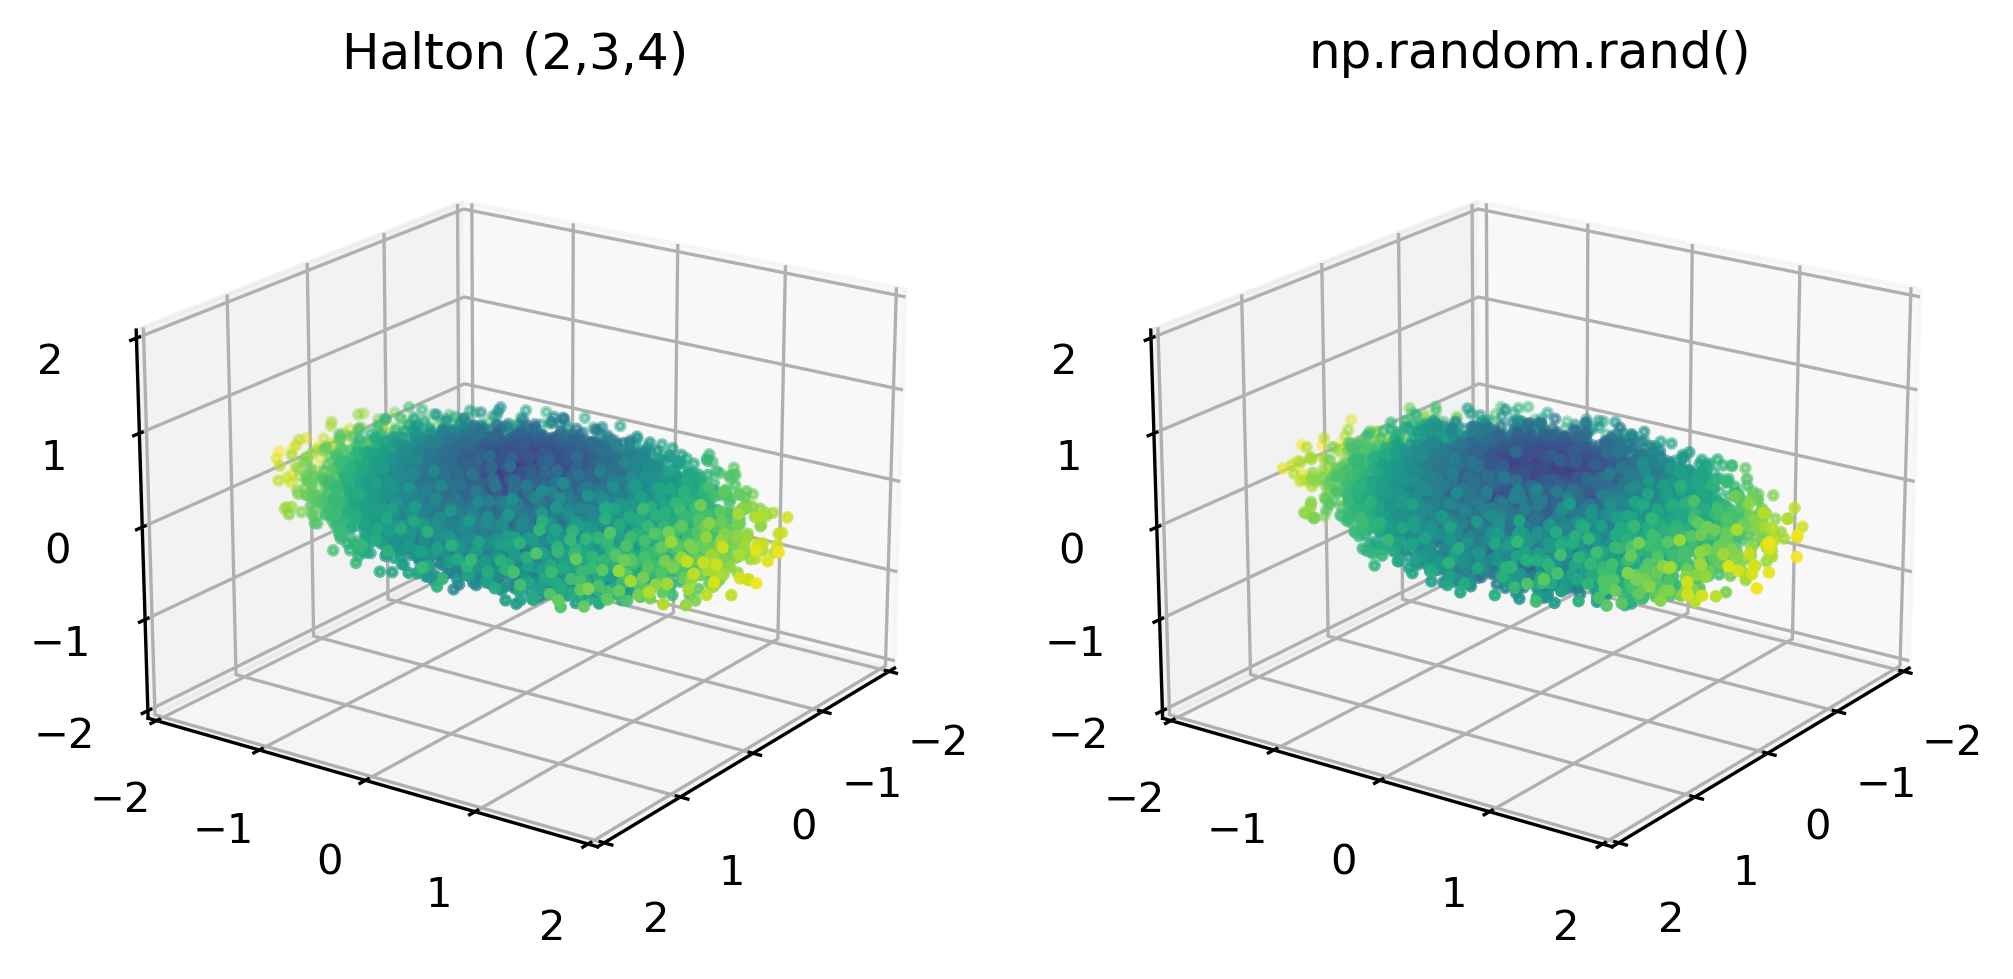

In [12]:
%matplotlib inline
point_size = 4
scales = np.array([0.5, 0.75, 0.25])
nsamples = 10000

fig = plt.figure(figsize=(8, 4), dpi=300)
qmcPoints = qmcGS.sampleAnisotropicGaussian(nsamples, scales=scales, truncate=True, truncScale=3)
randPoints = randGS.sampleAnisotropicGaussian(nsamples, scales=scales, truncate=True, truncScale=3)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(20, 35)
ax.scatter3D(qmcPoints[:, 0],
             qmcPoints[:, 1],
             qmcPoints[:, 2],
             c=np.linalg.norm(qmcPoints,axis=1),
             cmap='viridis',
             s=point_size)
ax.set_title('Halton (2,3,4)')
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(20, 35)
ax.scatter3D(randPoints[:, 0],
             randPoints[:, 1],
             randPoints[:, 2],
             c=np.linalg.norm(randPoints,axis=1),
             cmap='viridis',
             s=point_size)
ax.set_title('np.random.rand()')
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))

fig.set_facecolor('white')